In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit
%matplotlib inline
# 데이터 불러오기
dta = pd.read_csv('C:/gskim/P4DS/data/ch71.csv')
dta.columns=["y", "x1","x2","x3"]
dta.head()  # 상단의 5개의 데이터 확인하기

,y,x1,x2,x3
0,0,3,6,5
1,0,4,10,4
2,1,3,5,3
3,1,3,1,5
4,1,3,1,5


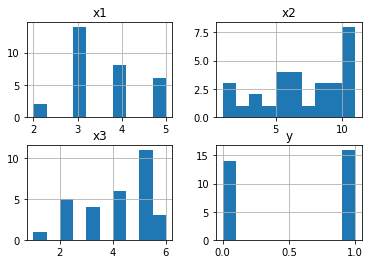

In [2]:
dta.hist()
plt.show()

In [3]:
affair_mod = sm.Logit.from_formula("y ~ x1 + x2 + x3", dta).fit()

Optimization terminated successfully.
         Current function value: 0.205563
         Iterations 9


In [4]:
print(affair_mod.summary())
print(np.exp(affair_mod.params))
print(affair_mod.pred_table())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   30
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            3
Date:                Sun, 14 Jun 2020   Pseudo R-squ.:                  0.7025
Time:                        09:55:11   Log-Likelihood:                -6.1669
converged:                       True   LL-Null:                       -20.728
Covariance Type:            nonrobust   LLR p-value:                 2.111e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.5833      6.810      2.288      0.022       2.235      28.931
x1            -0.9059      0.846     -1.071      0.284      -2.563       0.751
x2            -1.1087      0.488     -2.270      0.0

In [5]:
mfx = affair_mod.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                      y
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0567      0.047     -1.209      0.227      -0.149       0.035
x2            -0.0693      0.012     -5.799      0.000      -0.093      -0.046
x3            -0.0641      0.045     -1.412      0.158      -0.153       0.025


In [8]:
from sklearn import model_selection
from sklearn import metrics

# Model selection using Logistic Regression analysis
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# Data Frame
X=dta[['x1','x2', 'x3']]
Y=dta[['y']]

# Model fitness
clf.fit(X, Y)

# Forecasting depend on model
y_pred = clf.predict(X)

# Model Identification 
print("{} Result of Classification : \n{}\n".format(clf,metrics.classification_report(Y, y_pred)))
print("Accuracy:\n{}".format(metrics.accuracy_score(Y, y_pred)))
print("Confusion matrix:\n{}".format(metrics.confusion_matrix(Y, y_pred)))
print("ROC_AUC:\n{}".format(metrics.roc_auc_score(Y, y_pred)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) Result of Classification : 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.93      0.88      0.90        16

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30


Accuracy:
0.9
Confusion matrix:
[[13  1]
 [ 2 14]]
ROC_AUC:
0.9017857142857143


C:\Users\gskim\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9285714285714286 0.125


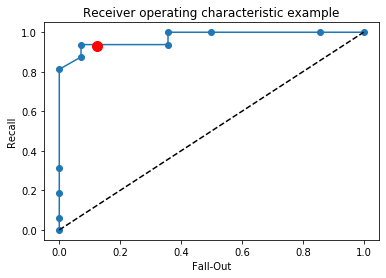

In [9]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
recall = 13 / (13 + 1)
fallout = 2 / (2 + 14)
print(recall, fallout)
fpr, tpr, thresholds = roc_curve(Y, clf.decision_function(X))
fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(Y, clf.predict_proba(X)[:, 1])
fpr, tpr, thresholds
plt.plot(fpr, tpr, 'o-', label="Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fallout], [recall], 'ro', ms=10)
plt.xlabel('Fall-Out')
plt.ylabel('Recall')
plt.title('Receiver operating characteristic example')
plt.show()

In [27]:
respondent0=dta.iloc[[0]]
affair_mod.predict(respondent0)
affair_mod.model.cdf(affair_mod.fittedvalues[0])

0.7478266809165098

In [18]:
dta.columns=["y", "x1","x2","x3"]
respondent30=dta.iloc[[-2]]
affair_mod.predict(respondent30)
affair_mod.model.cdf(affair_mod.fittedvalues[30])

0.0006515049478307336

In [19]:
respondent31=dta.iloc[[-1]]
affair_mod.predict(respondent31)
affair_mod.model.cdf(affair_mod.fittedvalues[31])

0.9944584770551094